# Task 2
This week you have learnt about various types of ML models. <br>
Let us focus on two of them.

In [107]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Instructions
1. create a folder called synapse_w2 in your drive
2. add housing_data.csv, classified_data.txt, titanic_data.csv in the folder.
3. You will use the data from this path in this notebook

# 1)  Linear Regression on Housing Price

### Import packages and dataset

In [108]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

**Read housing_data.csv using pandas and call head() to show first few records.**

In [109]:
# add code here
housing_df = pd.read_csv('/content/gdrive/MyDrive/synapse_w2/housing_data.csv')
housing_df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [110]:
# add code here
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [111]:
# add code here
housing_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [112]:
# add code here
for i in housing_df.columns:
  print(i)


Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Price
Address


### Basic plotting and visualization

**The target quantity is price. Let us see its distribution.** <br>
Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

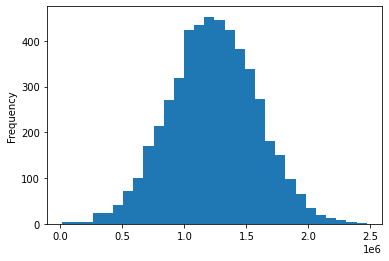

In [113]:
# add code here
housing_df['Price'].plot.hist(bins=30)


**Let us see how the different features are correlated with each other by printing a Correlation Matrix**<br>
Hint: corr()

In [114]:
# add code here
housing_df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


### Feature and variable sets

**Make a list of data frame column names**
**Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"**<br><br>
**Then create a new dataframe containing the target (Price) and store it in a variable called "y"**

In [115]:
# add code here
X = housing_df.select_dtypes(include=np.number)
X = X.drop(['Price'], axis = 1)

y = pd.DataFrame(housing_df['Price'])

In [116]:

# This code should print (5000, 5) and (5000,) if everything is correct
print(X.shape)
print(y.shape)

(5000, 5)
(5000, 1)


In [117]:
# print a few record of X
# add code here
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [118]:
# print a few record of y
# add code here
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


### Test-train split

**Import train_test_split function from scikit-learn**

In [119]:
# add code here
from sklearn.model_selection import train_test_split


**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [120]:
# add code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)**

In [121]:
# add code here
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


17500
7500
3500
1500
(3500, 5)
(1500, 5)
(3500, 1)
(1500, 1)


### Model fit and training

**Import LinearRegression and metrics from scikit-learn**

In [122]:
# add code for imports here
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Create a Linear Regression object 'lm' by calling LinearRegression()
# add code here
lm = LinearRegression()


**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**<br>
Hint: lm.fit()

In [123]:
# add code here
lm.fit(X_train , y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**<br>
Use model.predict() on X_test and store them in a variable called "predictions".<br>
Print type and size of the predictions. Size should be (1500,) if everything is correct.

In [124]:
# add code here
predictions = lm.predict(X_test)
print(predictions.size)
print(type(predictions))


1500
<class 'numpy.ndarray'>


**Since we're done with our predictions, let's compare it with y_test and see how accurate our predictions are.<br> Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

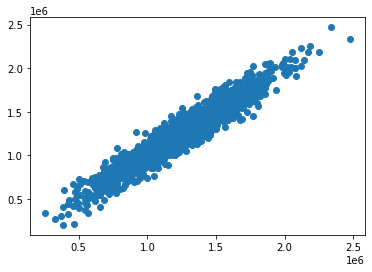

In [125]:
# add code here
plt.scatter(predictions, y_test)


**Print the R-square value and round it to 3 decimal places**<br>
Hint: sklearn metrics.r2_score

In [126]:
# add code here
r2 = metrics.r2_score(predictions, y_test)
round(r2, 3)


0.907

# 2) K-nearest neighbor Classification

### Import packages and dataset

In [127]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"** <br>
Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created.

In [128]:
# add code here
df = pd.read_csv('/content/gdrive/MyDrive/synapse_w2/classified_data.txt', index_col=0)
df.head(5)


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [129]:
# add code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [130]:
# add code here
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [131]:
# add code here
column_names = []
for i in df.columns:
  column_names.append(i)

column_names


['WTT',
 'PTI',
 'EQW',
 'SBI',
 'LQE',
 'QWG',
 'FDJ',
 'PJF',
 'HQE',
 'NXJ',
 'TARGET CLASS']

**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() 

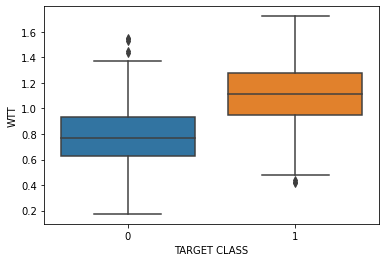

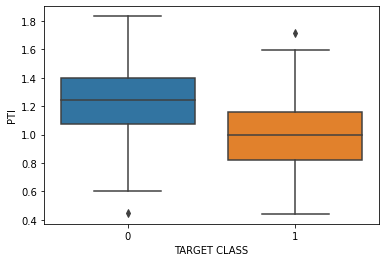

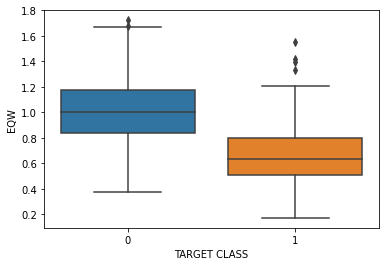

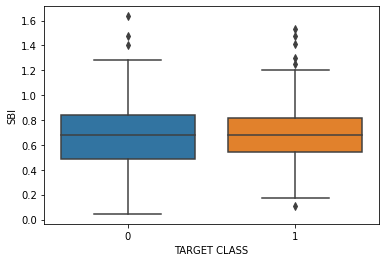

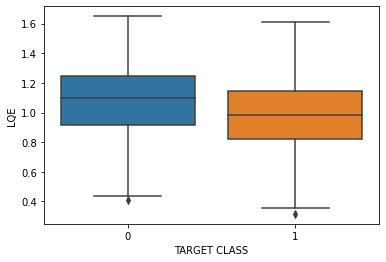

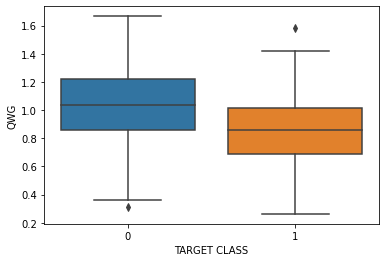

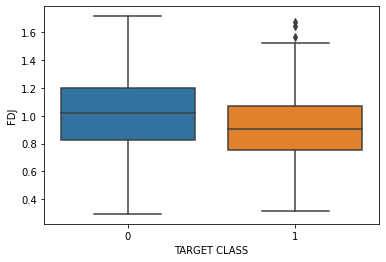

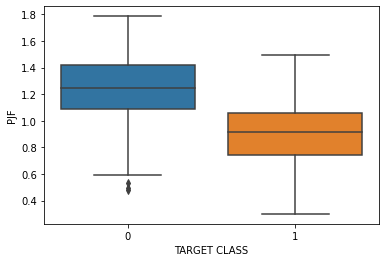

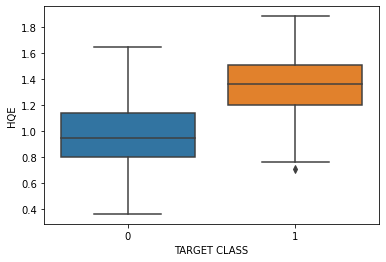

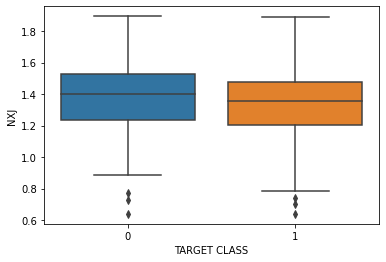

In [132]:
# add code here
features = df.drop(columns='TARGET CLASS')
for i in features.columns:
  sns.boxplot(x = df['TARGET CLASS'], y=features[i])
  plt.show()

### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.<br>
<br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [133]:
# add code here
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()


**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [134]:
# add code here
scaler.fit(features)
scaler.transform(features)

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [135]:
# add code here
df_feat = pd.DataFrame(scaler.transform(features), columns=['WTT',
 'PTI',
 'EQW',
 'SBI',
 'LQE',
 'QWG',
 'FDJ',
 'PJF',
 'HQE',
 'NXJ'])
df_feat.head(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initaial dataframe "df"

In [136]:
# add code here
X = df_feat
y = df['TARGET CLASS']

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [137]:
# add code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [138]:
# add code here
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [139]:
# add code here
pred = neigh.predict(X_test)

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [140]:
# add code here
from sklearn.metrics import classification_report
classi_report = classification_report(y_test, pred, output_dict=True)
classi_report.items()
# classi_report = classification_report(y_test, pred)
# print(classi_report)


dict_items([('0', {'precision': 0.9241379310344827, 'recall': 0.9436619718309859, 'f1-score': 0.9337979094076655, 'support': 142}), ('1', {'precision': 0.9483870967741935, 'recall': 0.930379746835443, 'f1-score': 0.939297124600639, 'support': 158}), ('accuracy', 0.9366666666666666), ('macro avg', {'precision': 0.9362625139043381, 'recall': 0.9370208593332144, 'f1-score': 0.9365475170041522, 'support': 300}), ('weighted avg', {'precision': 0.9369091583240636, 'recall': 0.9366666666666666, 'f1-score': 0.9366941627426316, 'support': 300})])

**Print the accuracy using numpy and round it to 3 decimal places.**

In [141]:
# add code here
res = dict((k, classi_report[k]) for k in ['accuracy']
                                        if k in classi_report)
for key in res:
    res[key] = np.round(res[key], decimals=3)
res

{'accuracy': 0.937}

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [142]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list

# add code here
accuracy =[]
for i in range(1,61):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  pred = neigh.predict(X_test)
  classi_report = classification_report(y_test, pred, output_dict=True)
  classi_report.items()
  res = dict((k, classi_report[k]) for k in ['accuracy']
                                        if k in classi_report)
  for key in res:
      res[key] = np.round(res[key], decimals=3)
      accuracy.append(res[key])
      print('Accuracy for n = ' + str(i) + ' is ' + str(res[key]))

print(accuracy)


Accuracy for n = 1 is 0.937
Accuracy for n = 2 is 0.917
Accuracy for n = 3 is 0.943
Accuracy for n = 4 is 0.943
Accuracy for n = 5 is 0.943
Accuracy for n = 6 is 0.943
Accuracy for n = 7 is 0.937
Accuracy for n = 8 is 0.943
Accuracy for n = 9 is 0.943
Accuracy for n = 10 is 0.95
Accuracy for n = 11 is 0.95
Accuracy for n = 12 is 0.953
Accuracy for n = 13 is 0.953
Accuracy for n = 14 is 0.953
Accuracy for n = 15 is 0.953
Accuracy for n = 16 is 0.953
Accuracy for n = 17 is 0.953
Accuracy for n = 18 is 0.95
Accuracy for n = 19 is 0.947
Accuracy for n = 20 is 0.947
Accuracy for n = 21 is 0.95
Accuracy for n = 22 is 0.943
Accuracy for n = 23 is 0.943
Accuracy for n = 24 is 0.947
Accuracy for n = 25 is 0.94
Accuracy for n = 26 is 0.943
Accuracy for n = 27 is 0.947
Accuracy for n = 28 is 0.947
Accuracy for n = 29 is 0.95
Accuracy for n = 30 is 0.95
Accuracy for n = 31 is 0.95
Accuracy for n = 32 is 0.95
Accuracy for n = 33 is 0.95
Accuracy for n = 34 is 0.95
Accuracy for n = 35 is 0.95
Accura

**Plot a graph of K value vs Accuracy**

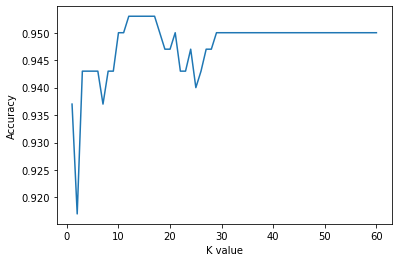

In [143]:
# add code here
x = list(range(1, 61))  
plt.plot(x, accuracy)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [144]:
# add code here 

# reason: list.sort(reverse=True) sorts all the accuracies for the various values of n in descending order and checks the accuracy for that respective value. 
# Hence by taking the first value in the list, we are taking the value of n which gives the highest accuracy. From the prev cell we see that n = [12, 17].

accuracy.sort(reverse=True)
print(accuracy[0])

0.953


# 3). Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [145]:
#write code here
titanic_df = pd.read_csv('/content/gdrive/MyDrive/synapse_w2/titanic_data.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [146]:
def titanic_preprocessing_pipeline(titanic_df):
  import re
  titles=[]
  for i in range (0,891):
    name = (titanic_df.iat[i, 3])
    title_search = re.search('(\w+)\.', name)
    if title_search:
      title = title_search.group(1)
      titles.append(title)
  titanic_df['Title']=titles

  titanic_df.drop(columns=['PassengerId', 'Ticket', 'Name'], inplace= True, axis=1)
  titanic_df.isnull().sum() * 100 / len(titanic_df)
  titanic_df.drop(columns=['Cabin'], inplace= True)
  titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace = True)
  titanic_df['Age'].fillna(titanic_df['Age'].mean(axis = 0), inplace = True)
  titanic_df.isnull().sum() * 100 / len(titanic_df)
  familyMembers = []
  for i in titanic_df.index:
    value = titanic_df.iloc[i]['SibSp'] + titanic_df.iloc[i]["Parch"]
    familyMembers.append(value)
    i += 1
  titanic_df['Family_Members'] = familyMembers
  titanic_df.drop(columns=['SibSp', 'Parch'], inplace= True)
  titanic_df['Age'] = (titanic_df['Age']-titanic_df['Age'].min())/(titanic_df['Age'].max()-titanic_df['Age'].min())
  titanic_df['Fare'] = (titanic_df['Fare']-titanic_df['Fare'].min())/(titanic_df['Fare'].max()-titanic_df['Fare'].min())
  titanic_df['Family_Members'] = (titanic_df['Family_Members']-titanic_df['Family_Members'].min())/(titanic_df['Family_Members'].max()-titanic_df['Family_Members'].min())
  df_ohe = pd.get_dummies(titanic_df, columns=["Pclass", "Sex", "Embarked", "Title"])
  return df_ohe

titanic_preprocessing_pipeline(titanic_df)

,Survived,Age,Fare,Family_Members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,0,0.271174,0.014151,0.1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0.472229,0.139136,0.1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0.321438,0.015469,0.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0.434531,0.103644,0.1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0.434531,0.015713,0.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0.025374,0.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
887,1,0.233476,0.058556,0.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
888,0,0.367921,0.045771,0.3,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
889,1,0.321438,0.058556,0.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [147]:
#write code here
y = titanic_df['Survived']
X = titanic_df.select_dtypes(include=np.number)

<b>remove the y_label (survived) from the dataframe</b>

In [148]:
#write code here
X.drop(columns=['Survived'], inplace= True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<b>Split the data into train and test. (do a split in the ratio 30:70)</b>

In [149]:
#write code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>

Make sure that you play with the hyperparameters to get a good result. You can even use bagging and boosting methods like random forest or adaboost to improve your accuracy. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

<b>Note that the accuracy on the test set will be considered and brownie points for not overfitting the model in the process</b>

In [150]:
#write code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeClassifier(random_state=42, max_depth=15)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [151]:
#dt_model.score(X_train, y_train,)

In [152]:
#dt_model.score(X_test, y_test)

In [153]:
#dt_model.predict(X_test)

In [154]:
#dt_model.predict_proba(X_test)

In [155]:
#dt_model.predict(X_test)

In [156]:
y_pred = dt_model.predict_proba(X_test)[:,1]

In [157]:
new_y = []
for i in range(len(y_pred)) :
  if y_pred[i]< 0.6:
    new_y.append(0)
  else:
    new_y.append(1)

In [158]:
from sklearn.metrics import accuracy_score 

In [159]:
accuracy_score(y_test, new_y)

0.6455223880597015

In [160]:
train_accuracy = []
test_accuracy = []
for depth in range(1,10):
  dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
  dt_model.fit(X_train, y_train)
  train_accuracy.append(dt_model.score(X_train, y_train))
  test_accuracy.append(dt_model.score(X_test, y_test))

# from sklearn.model_selection import KFold
# from sklearn.ensemble import RandomForestClassifier

# kf = KFold(n_splits=50, shuffle=True)
# test_acc=[]
# train_acc=[]
# model = RandomForestClassifier(n_estimators=300, max_depth=15)
# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     model.fit(X_train, y_train)
#     test_acc.append(model.score(X_test, y_test))
#     train_acc.append(model.score(X_train, y_train))

In [161]:
frame = pd.DataFrame({'max_depth': range(1,10), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
frame

,max_depth,train_acc,test_acc
0,1,0.662921,0.679104
1,2,0.701445,0.667910
2,3,0.739968,0.694030
3,4,0.743178,0.697761
4,5,0.760835,0.686567
5,6,0.767255,0.694030
6,7,0.775281,0.675373
7,8,0.802568,0.686567
8,9,0.820225,0.701493


In [162]:
dt_model = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=25, random_state=10)

In [163]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [164]:
dt_model.score(X_train, y_train)

0.6629213483146067

In [165]:
dt_model.score(X_test, y_test)

0.6791044776119403

In [166]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)

# from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)
# roc_auc

In [167]:
# n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 128, 200, 264]
# train_results = []
# test_results = []

# for estimator in n_estimators:
#   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
#   rf.fit(X_train, y_train)
#   train_pred = rf.predict(X_train)
#   fpr, tpr, thresholds = roc_curve(y_train, train_pred)
#   roc_auc = auc(fpr, tpr)
#   train_results.append(roc_auc)
#   y_pred = rf.predict(X_test)
#   fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#   roc_auc = auc(fpr, tpr)
#   test_results.append(roc_auc)

# print(train_results)   
# print(test_results)

# from sklearn.model_selection import KFold
# from sklearn.ensemble import RandomForestClassifier

# kf = KFold(n_splits=10, shuffle=True)
# test_acc=[]
# train_acc=[]
# model = RandomForestClassifier(n_estimators=300, max_depth=15)

# for train_index, test_index in kf.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     model.fit(X_train, y_train)
#     test_acc.append(model.score(X_test, y_test))
#     train_acc.append(model.score(X_train, y_train))





<b>print the test accuracy and train accuracy here</b>

In [169]:
#write code here
print(dt_model.score(X_test, y_test))
print(dt_model.score(X_train, y_train))

0.6791044776119403
0.6629213483146067
